<a href="https://colab.research.google.com/github/q-viper/SmogDetection/blob/master/smog_detection_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras==2.1.3
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
import os
import matplotlib.pyplot as plt

     |████████████████████████████████| 327kB 2.8MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.1.3 which is incompatible.
  Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def get_dataset():
#     clear = open('clear.csv', 'r')
    clear = open('/content/drive/My Drive/Smog Detection/clear.csv', 'r')
    smog = open('/content/drive/My Drive/Smog Detection/smog.csv', 'r')

    clear_rows = clear.readlines()
    clear.close()
    
#     smog = open('smog.csv', 'r')
    smog_rows = smog.readlines()
    smog.close()
    
    
    examples = len(clear_rows)
#     print(examples)
#     clear_datasets = np.zeros([examples, 300001])
    clear_datasets = []
    smog_datasets = []
    for i in range(examples):
        single_row = clear_rows[i]
        single_row = single_row.split(',')

        single_row = np.asarray(single_row, dtype = np.int32)
        label = np.array(1)
        clear_datasets.append(np.hstack([label, single_row]))
    
    for i in range(examples):
        single_row = smog_rows[i]
        single_row = single_row.split(',')
        single_row = np.asarray(single_row, dtype = np.int32)
        label = np.array(0)
        smog_datasets.append(np.hstack([label, single_row]))
        
    return clear_datasets + smog_datasets

In [0]:
datasets = get_dataset()

In [0]:
example = np.array(datasets)
np.random.shuffle(example)
examples = len(example)
# print(examples)
labels = np.array([example[i][0] for i in range(examples)])
images = np.array([example[i][1:].reshape(100, 100, 3) / 255 for i in range(examples)])



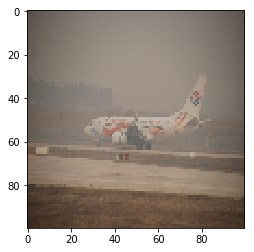

In [6]:
plt.imshow(images[501])
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2) 
y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_test = keras.utils.to_categorical(y_test, num_classes=2)


In [8]:
# inception 
from keras.layers import Input
from keras.models import Model

input_img = Input(shape = (100, 100, 3))

tower_1 = Conv2D(32, (1,1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(32, (3,3), padding='same', activation='relu')(tower_1)
tower_2 = Conv2D(32, (1,1), padding='same', activation='relu')(input_img)
tower_2 = Conv2D(32, (5,5), padding='same', activation='relu')(tower_2)
tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
tower_3 = Conv2D(32, (1,1), padding='same', activation='relu')(tower_3)

output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis = 3)

output = Flatten()(output)
output = Dropout(0.5)(Dense(960000, activation = 'relu')(output))
out    = Dense(2, activation='softmax')(output)

model = Model(inputs = input_img, outputs = out)
print (model.summary())



W0724 14:59:54.857437 139954482096000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:68: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 14:59:54.905065 139954482096000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:504: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 14:59:54.913546 139954482096000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3828: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0724 14:59:54.991692 139954482096000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3652: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0724 14:59:55.041120 139954482096000 deprecation_wrapp

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 100, 100, 32) 128         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 100, 100, 32) 128         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 100, 100, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (

In [0]:
ds#model used for DCR
model = Sequential()
model.add(Conv2D(32, (5, 5), activation = 'relu', input_shape = (100, 100, 3), data_format = 'channels_last'))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.summary()

In [26]:
#VGG
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(100, 100, 3)))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 100, 100, 32)      896       
_________________________________________________________________
dropout_22 (Dropout)         (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
dropout_23 (Dropout)         (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 50, 50, 64)        36928     
__________

In [0]:
#Compile the model
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


In [28]:
import time 

#Evaluate the model, 
time1 = time.time()
history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split = 0.2)
time2 = time.time()
score = model.evaluate(x_test, y_test, batch_size=32, verbose = 1)
time3 = time.time()
print("Train time = ", (time2 - time1)/60, "min", "\nTest time = ", (time3 - time2)/ 60, "min", "\n Test loss: ", score[0], " Test accuracy: ", score[1])

Train on 5854 samples, validate on 1464 samples
Epoch 1/100
5854/5854 [==============================] - 20s 3ms/step - loss: 0.6803 - acc: 0.5625 - val_loss: 0.6810 - val_acc: 0.5082
Epoch 2/100
5854/5854 [==============================] - 18s 3ms/step - loss: 0.5301 - acc: 0.7419 - val_loss: 0.5147 - val_acc: 0.7609
Epoch 3/100
5854/5854 [==============================] - 18s 3ms/step - loss: 0.4580 - acc: 0.7928 - val_loss: 0.5402 - val_acc: 0.7281
Epoch 4/100
5854/5854 [==============================] - 18s 3ms/step - loss: 0.4263 - acc: 0.8157 - val_loss: 0.4229 - val_acc: 0.8128
Epoch 5/100
5854/5854 [==============================] - 18s 3ms/step - loss: 0.3927 - acc: 0.8292 - val_loss: 0.4345 - val_acc: 0.8142
Epoch 6/100
5854/5854 [==============================] - 18s 3ms/step - loss: 0.3483 - acc: 0.8584 - val_loss: 0.4384 - val_acc: 0.8040
Epoch 7/100
5854/5854 [==============================] - 18s 3ms/step - loss: 0.3144 - acc: 0.8762 - val_loss: 0.4309 - val_acc: 0.8012


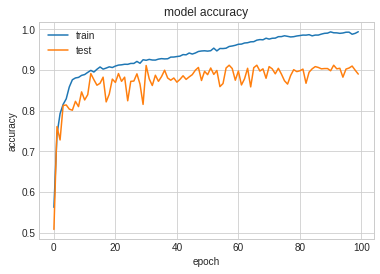

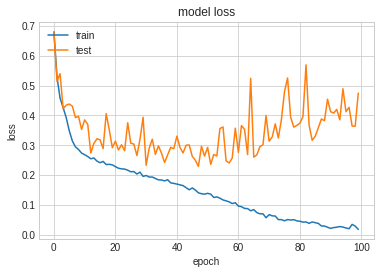

In [29]:
plt.style.use('seaborn-whitegrid')
# list all data in history
# print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
#save a model

from keras.models import model_from_json
from keras.models import load_model

print(keras.__version__)

model_json = model.to_json()

with open("model1.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model1.h5")

2.1.3


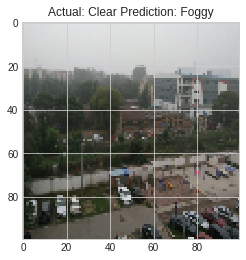

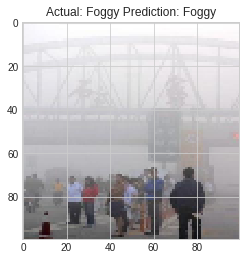

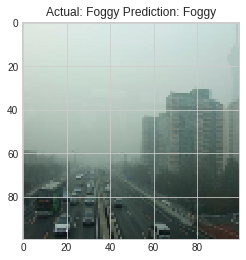

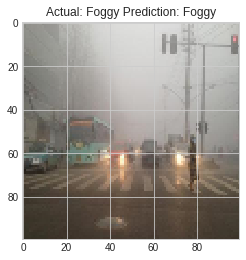

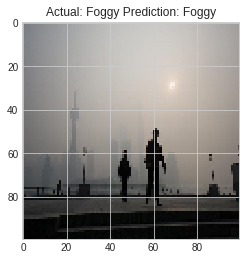

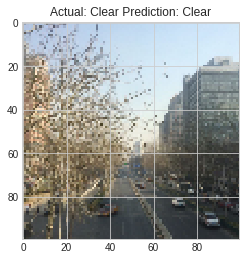

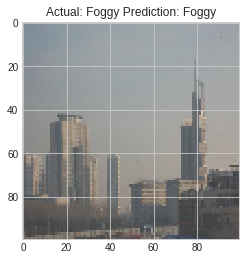

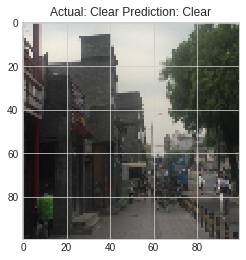

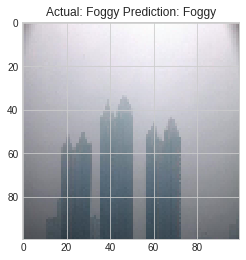

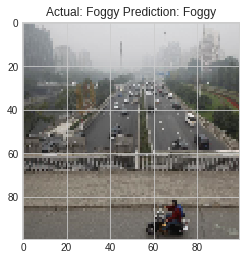

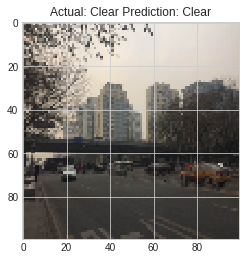

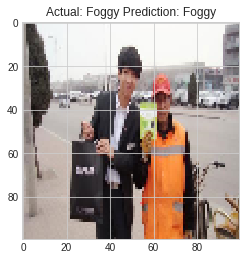

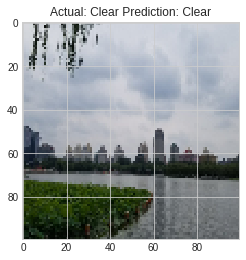

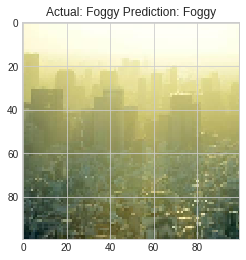

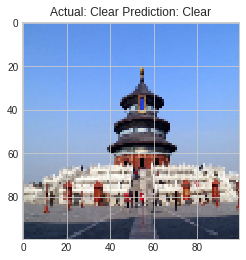

In [21]:
#check some examples
plt.style.use('seaborn-whitegrid')
for i in range(15):
    img = x_test[i].reshape(1, 100, 100, 3)
    lbl = np.argmax(y_test[i])
    prediction = model.predict(img)
#     print(prediction)
    prediction = np.argmax(prediction)
#     print(prediction, lbl)
    classes = ["Foggy", "Clear"]
    title = f"Actual: {classes[lbl]} Prediction: {classes[prediction]}"
    plt.imshow(img.reshape(100, 100, 3))
    plt.title(title)
    plt.show()